In [1]:
!nvidia-smi

Mon May 29 05:16:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os

print(os.getcwd())

/content


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [18]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LlZiJ57O5ONvY7b3XzPN")
project = rf.workspace("college-qcgpx").project("planet-detection")
dataset = project.version(9).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Planet-Detection-9 in yolov8:: 100%|██████████| 8342/8342 [00:02<00:00, 3748.77it/s]


In [45]:
%cd /content
import shutil
print(os.listdir())
#shutil.rmtree('Planet-Detection-9')
#os.mkdir('datasets')
#shutil.copytree('Planet-Detection-9', os.path.join('datasets', 'Planet-Detection-9'))
os.chdir('/content/datasets/Planet-Detection-9')
print(os.listdir())
#os.chdir('/Planet-Detection-9')
#print(os.listdir())
#shutil.copytree('Planet-Detection-9', os.path.join('datasets', 'Planet-Detection-9'))
#print(os.listdir())
#os.chdir('datasets')
#os.chdir('Planet-Detection-9')
#print(os.listdir())
#print(os.path.abspath('/Planet-Detection-9/data.yaml'))

# TODO: delete planet detection folder from content

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=30 imgsz=640 plots=True

/content
['.config', 'datasets']
['README.roboflow.txt', 'test', 'data.yaml', 'README.dataset.txt', 'train', 'valid', 'yolov8s.pt', 'runs']
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

In [46]:
!ls runs/detect/train3

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch4560.jpg
events.out.tfevents.1685338481.7baaeb9686cf.7261.0  train_batch4561.jpg
F1_curve.png					    train_batch4562.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


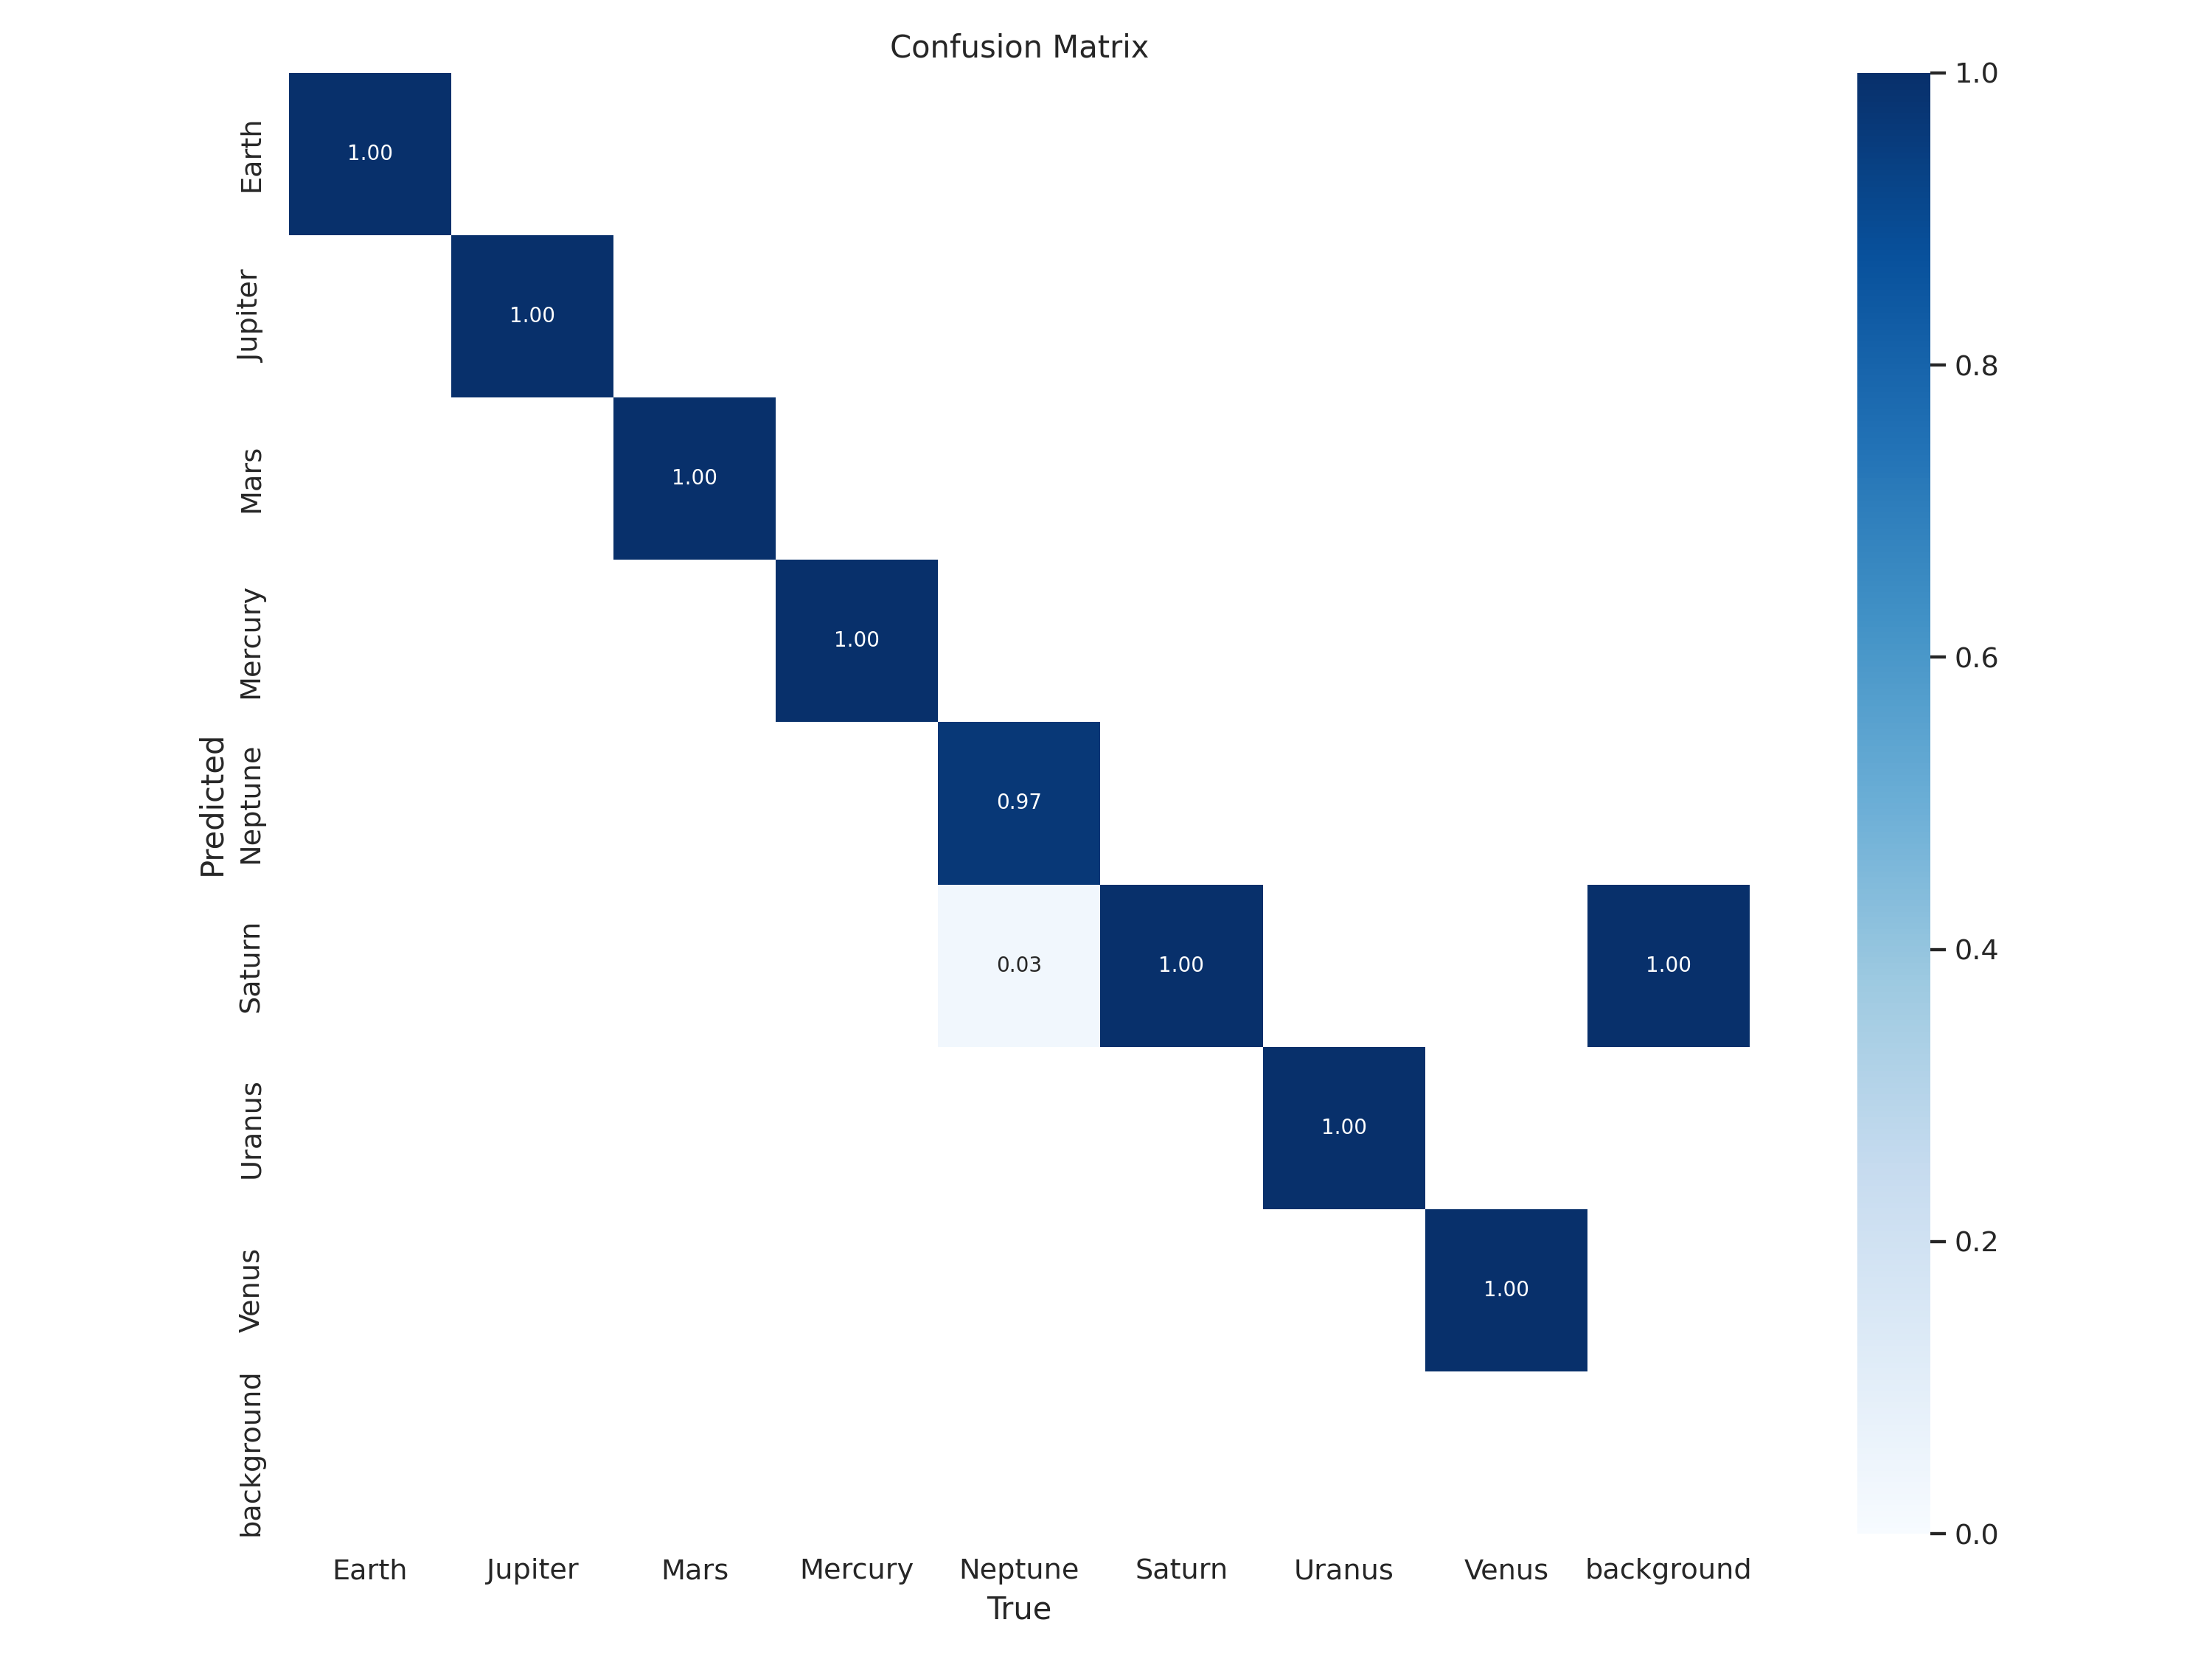

In [47]:
Image(filename=f'runs/detect/train3/confusion_matrix.png', width=600)

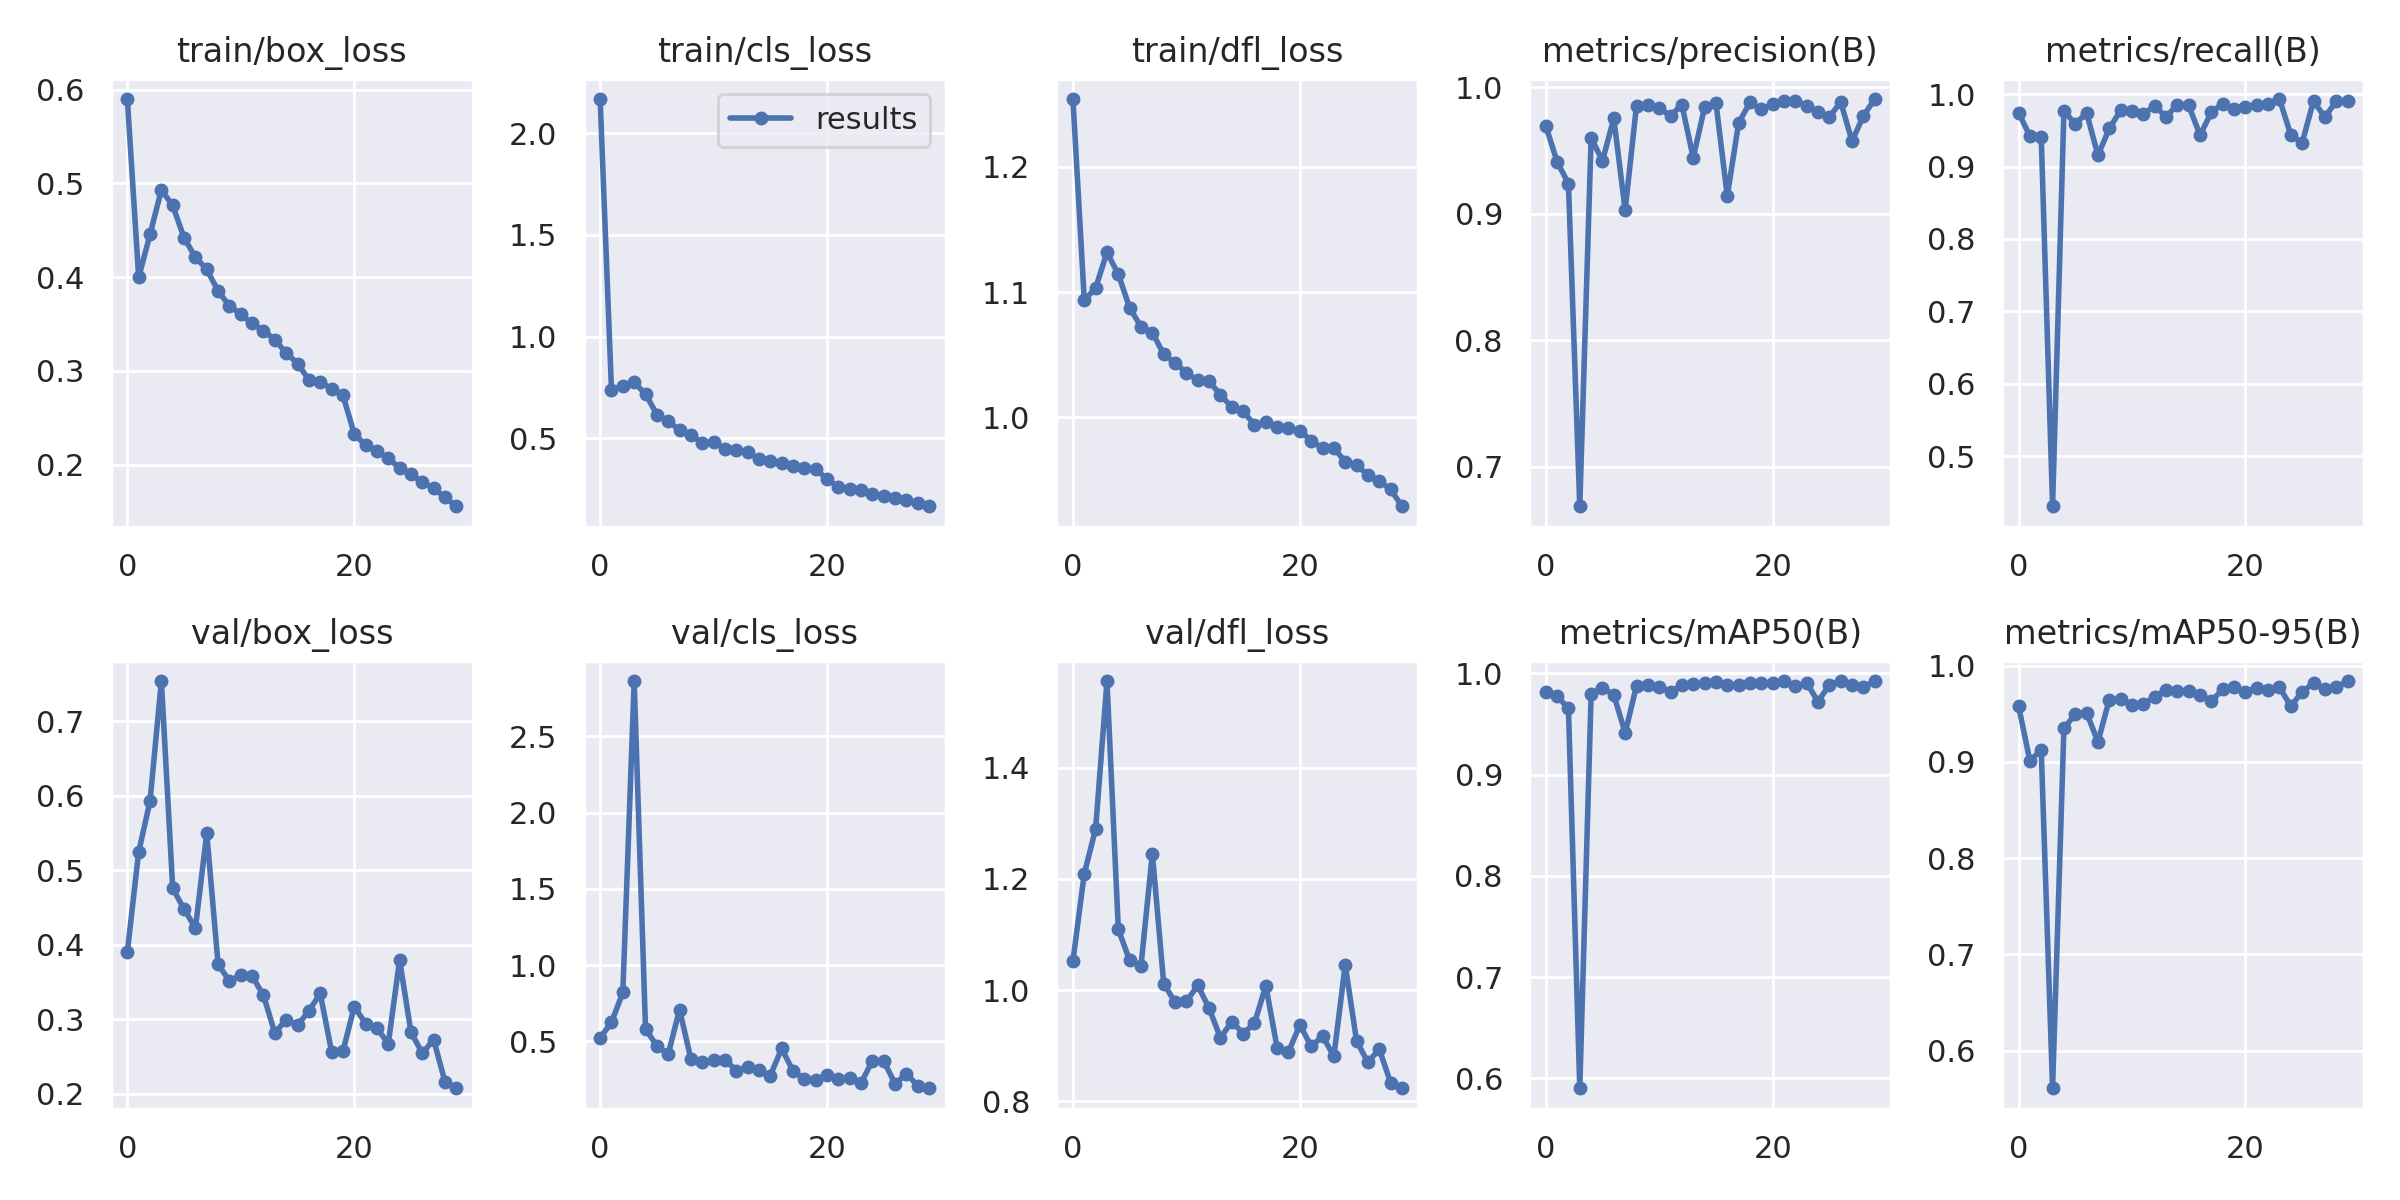

In [48]:
Image(filename=f'runs/detect/train3/results.png', width=600)

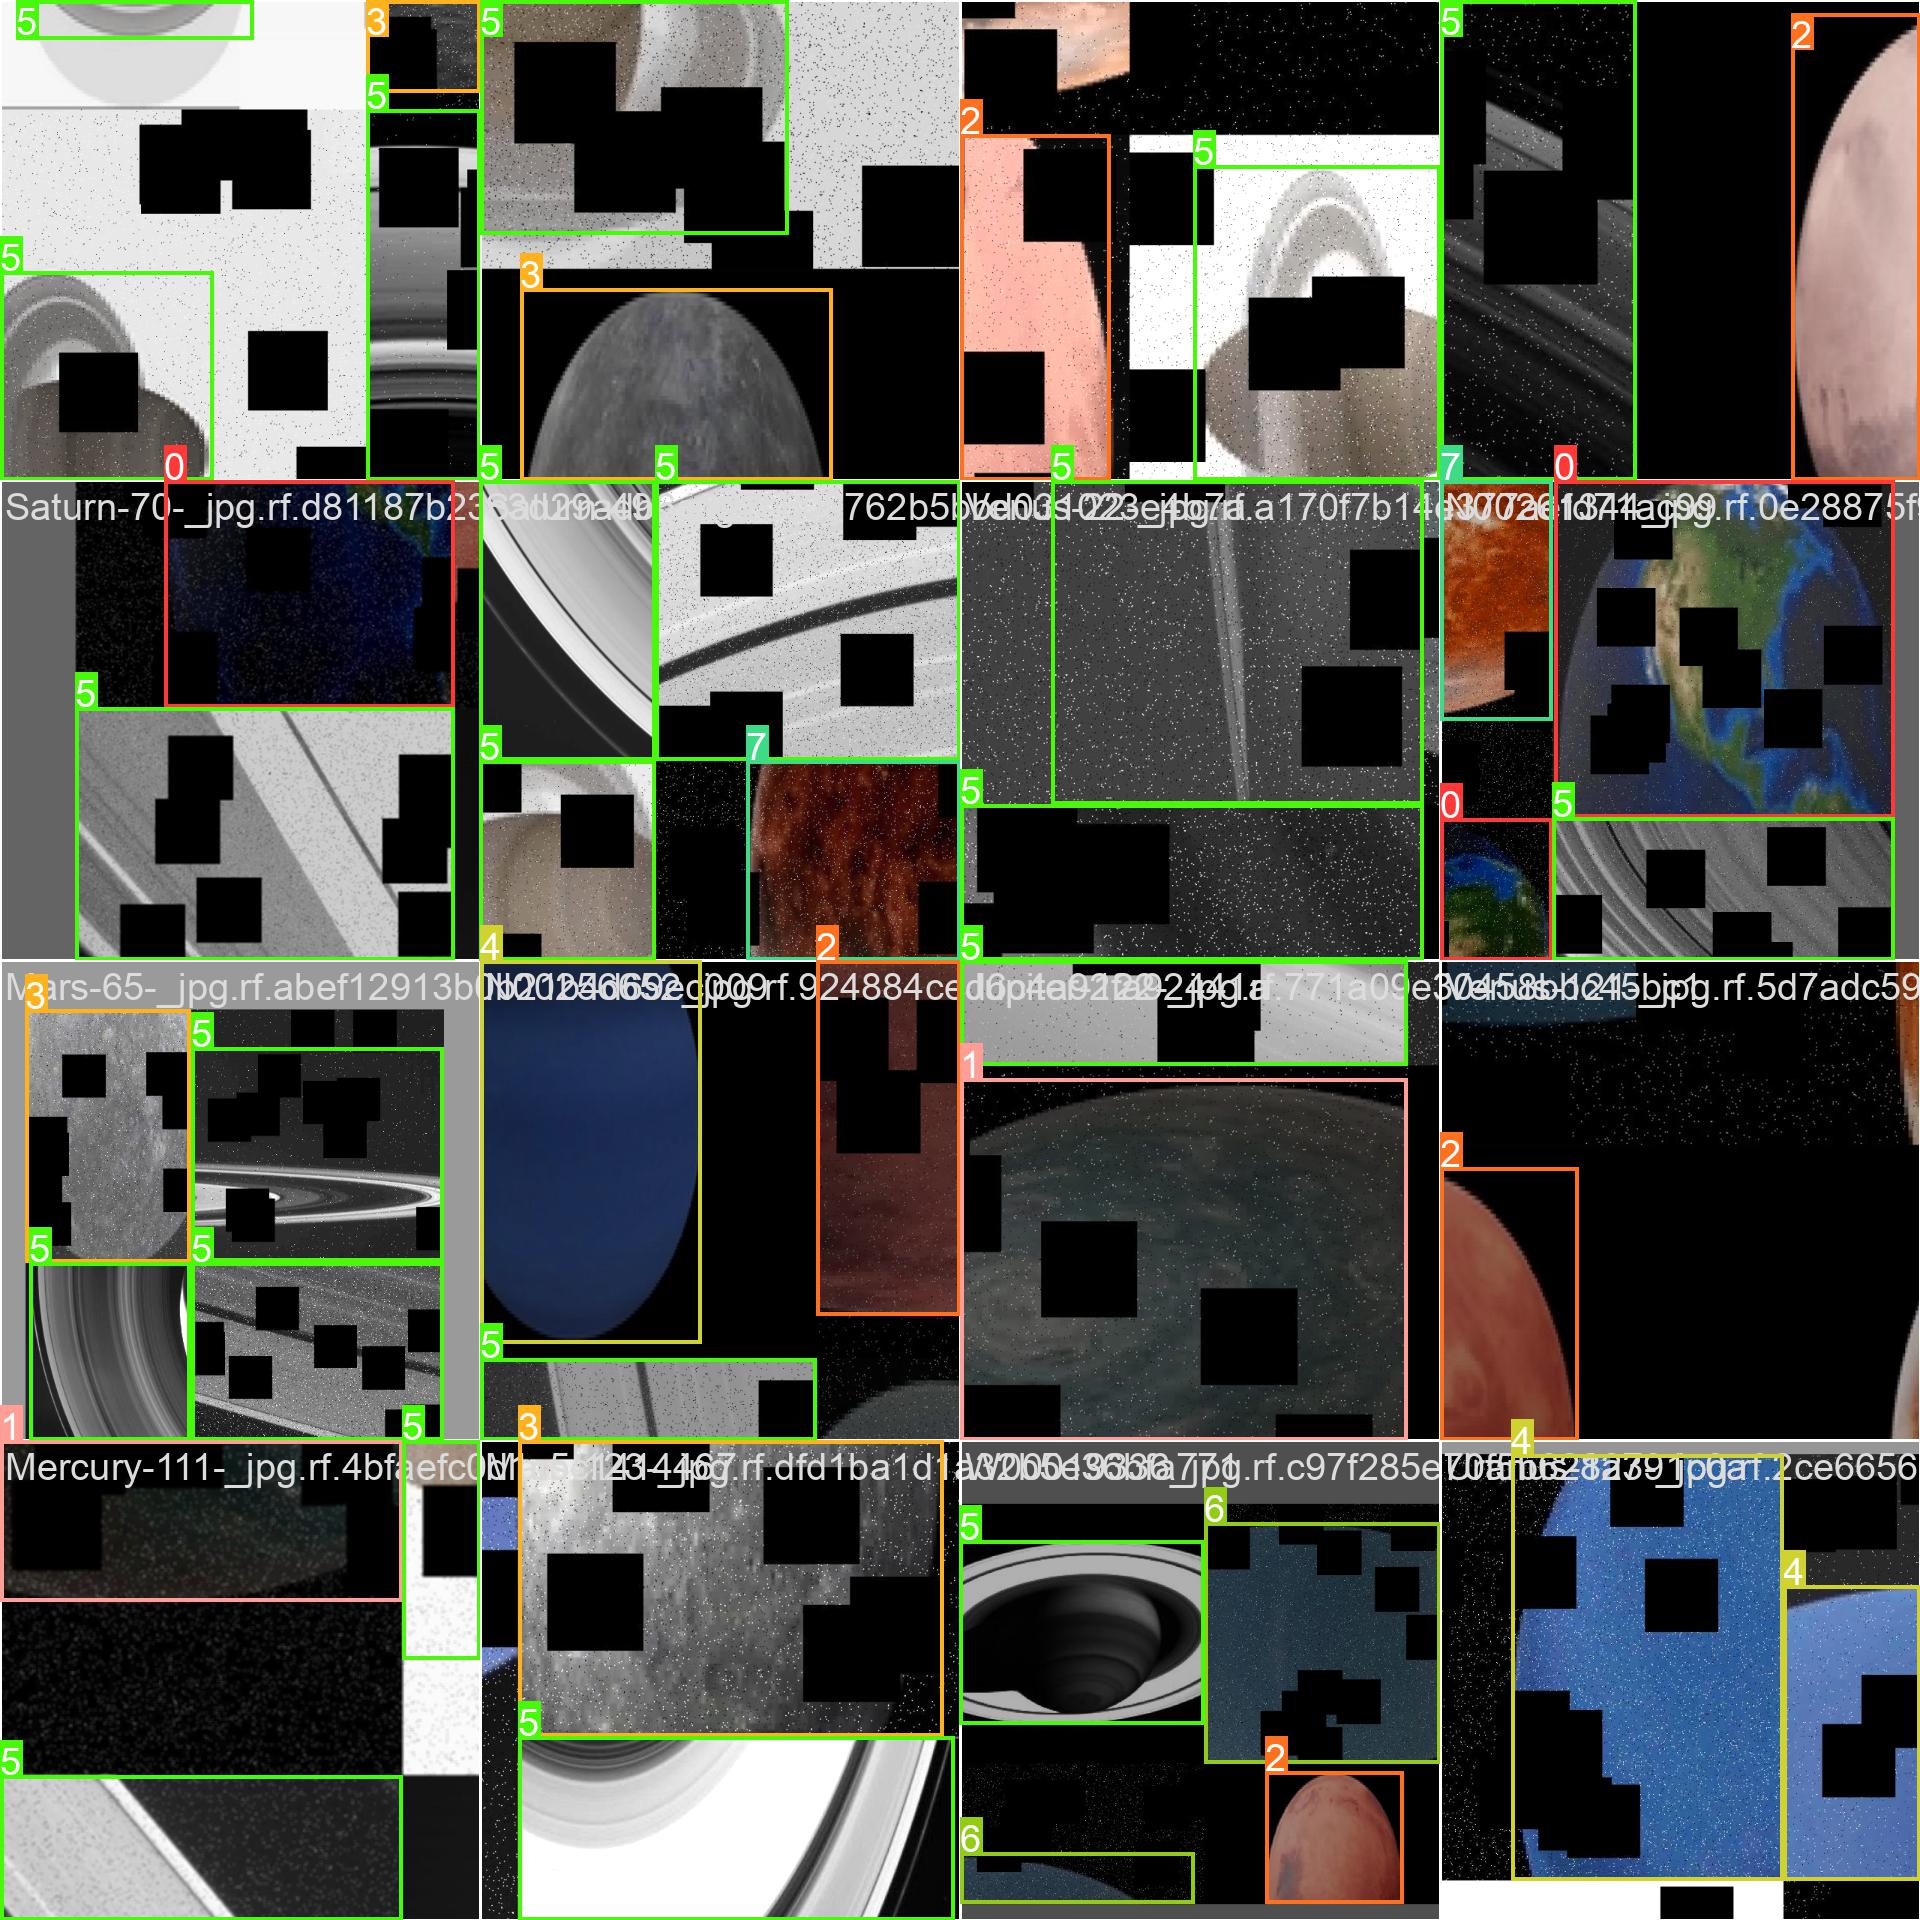

In [49]:
Image(filename=f'runs/detect/train3/train_batch0.jpg', width=600)

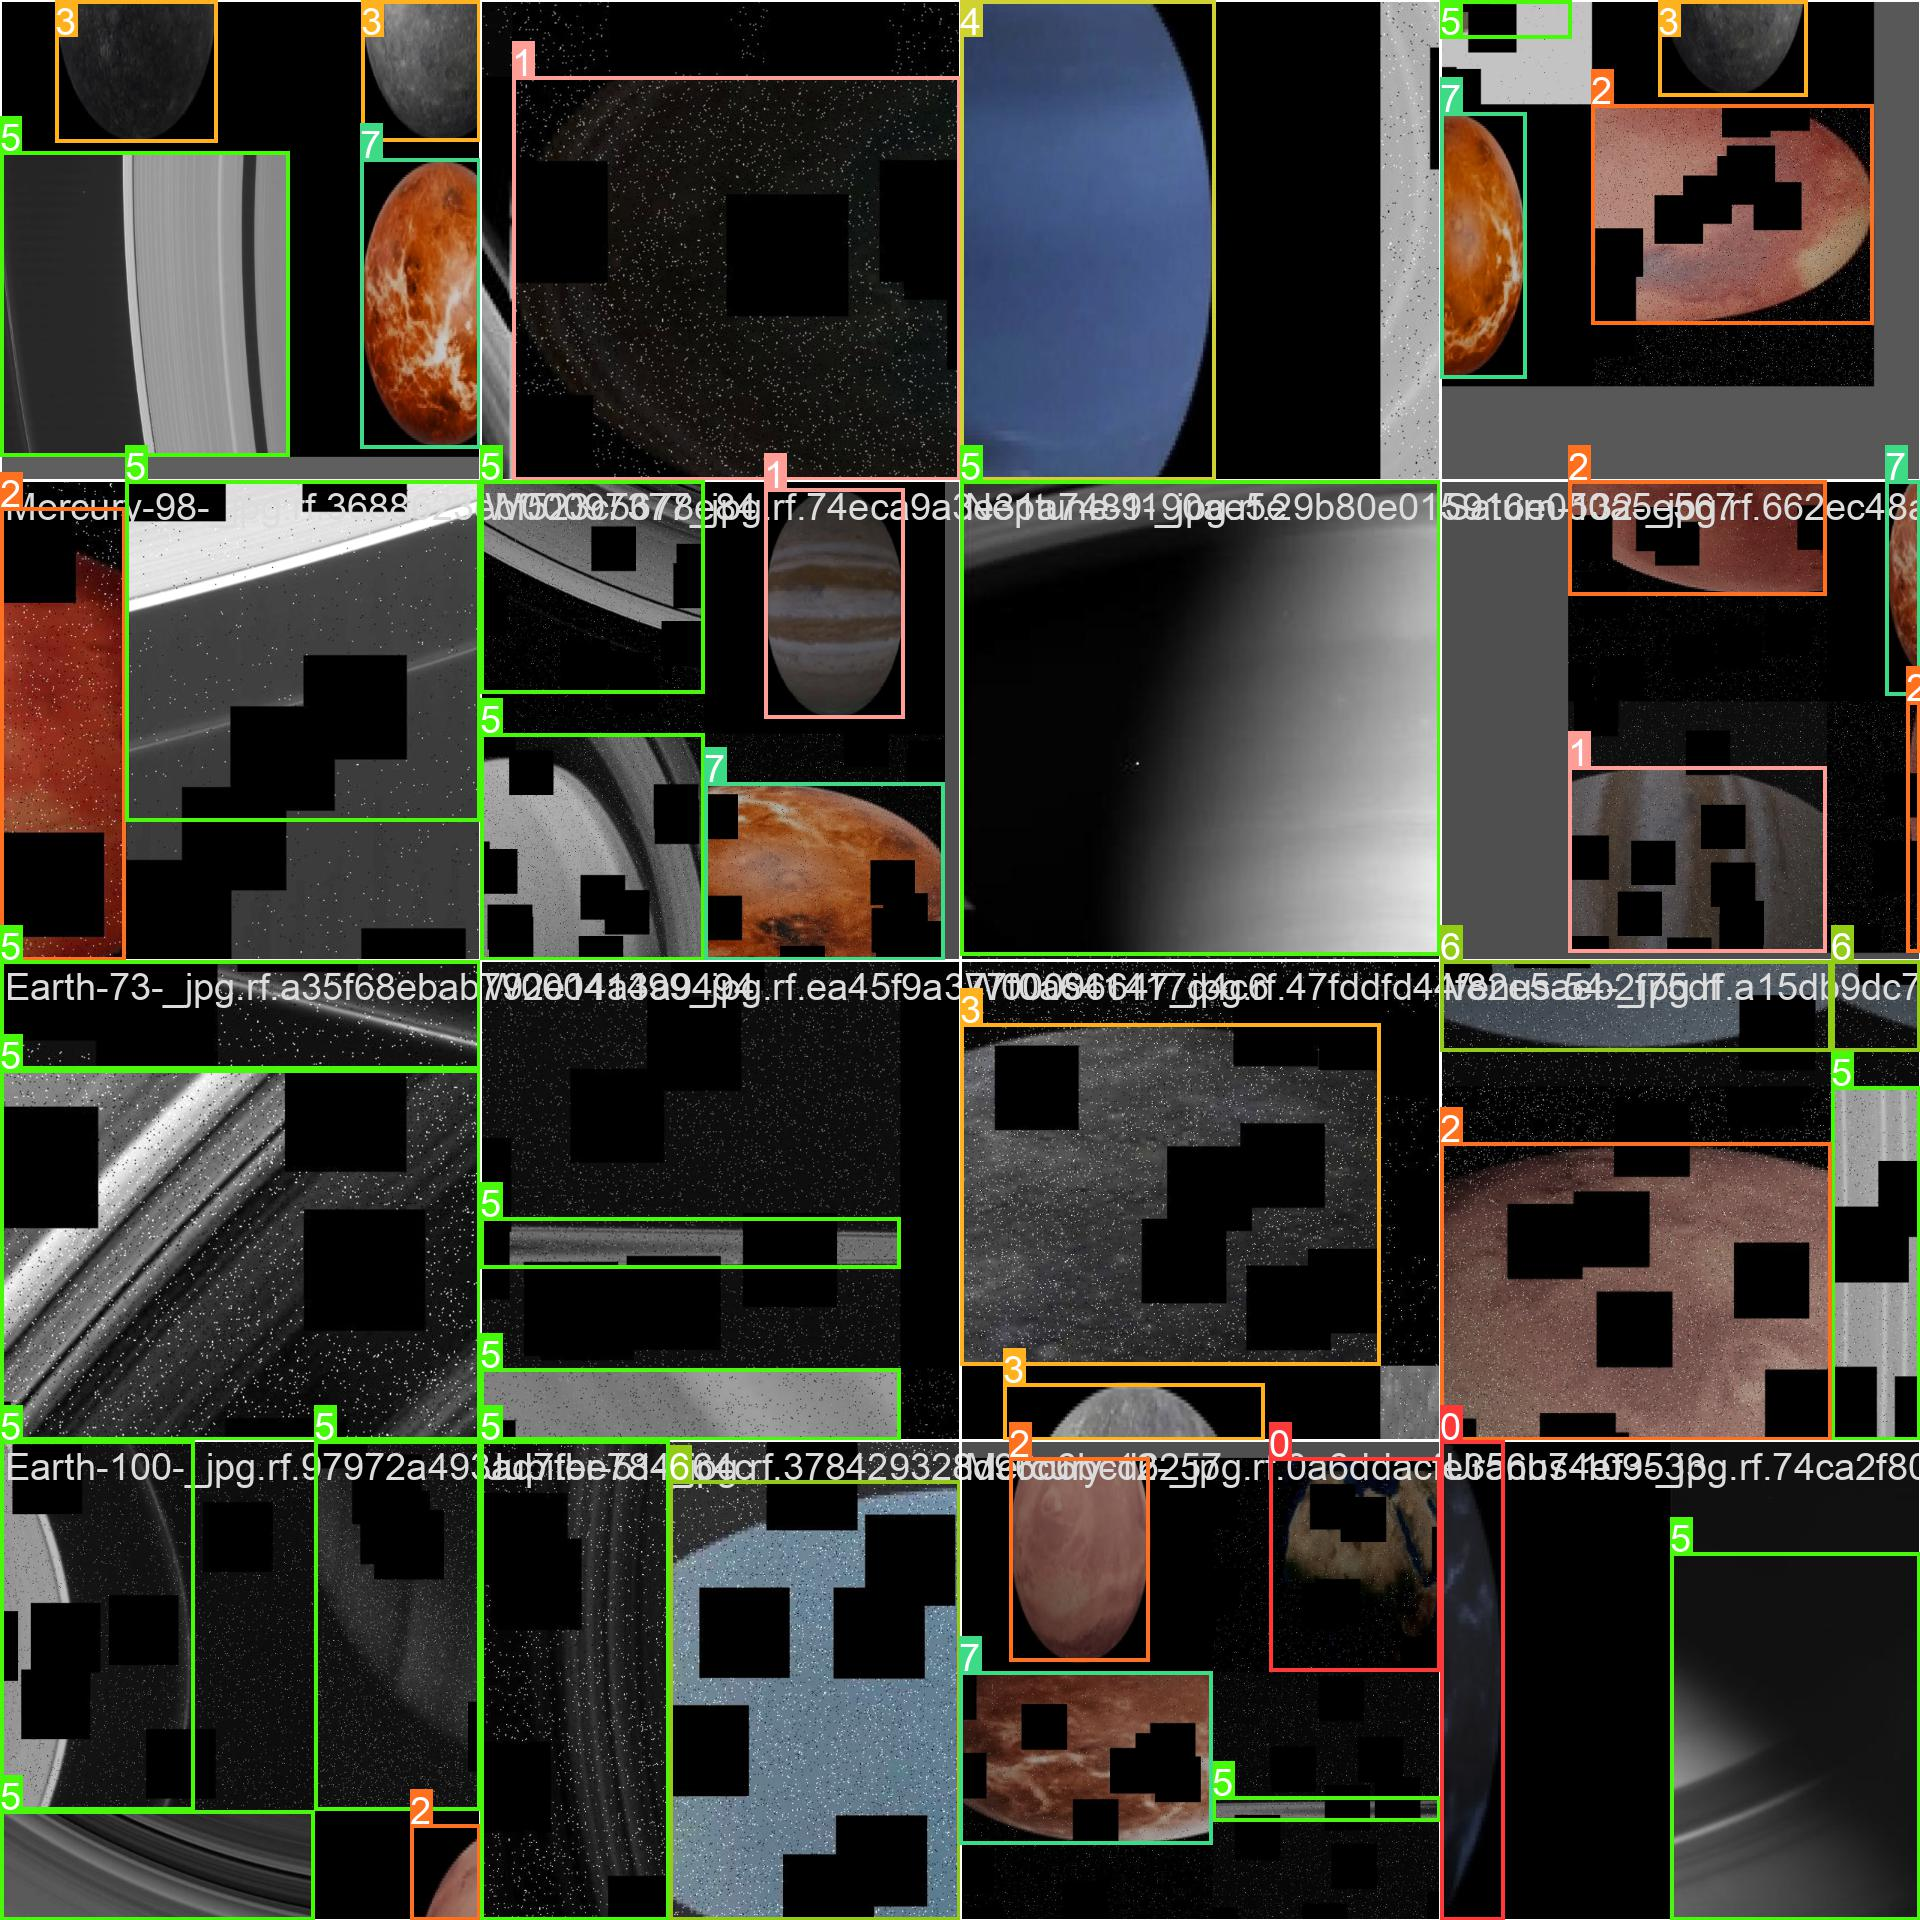

In [50]:
Image(filename=f'runs/detect/train3/train_batch1.jpg', width=600)

In [51]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

2023-05-29 06:42:56.227593: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 06:42:57.122374: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Planet-Detection-9/valid/labels.cache... 341 images, 0 backgrounds, 0 corrupt: 100% 341/341 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:08<00:00,  2.63it/s]
                   all        341        341      0.991      0.991      0.992      0.984
                 Earth        341       

In [58]:
print(os.listdir())
print('\n'.join(os.listdir('test/images')))

['README.roboflow.txt', 'test', 'data.yaml', 'README.dataset.txt', 'train', 'valid', 'yolov8s.pt', 'runs']
N00032788_jpg.rf.6dfc0477ba18b9dc6f8905b8aeeb07ed.jpg
Jupiter-47-_jpg.rf.6ffddf4de3ec321c22c67583b486f063.jpg
Neptune-145-_jpg.rf.8f8523a755041c2d5874d301800a4c71.jpg
Jupiter-99-_jpg.rf.c2ba092e2e9313cee356b9d274e12870.jpg
W00021447_jpg.rf.59aa67171d21b98a4df4baa9a9432475.jpg
N00220803_jpg.rf.05318775299ea83be2764e83ea72889f.jpg
N00263258_jpg.rf.cc0d66dd80c702a430f2fc41bd696a29.jpg
Mercury-127-_jpg.rf.46de45ade9b26bbee8bd2126a34abe7f.jpg
Uranus-79-_jpg.rf.5cfd7dd3b3eab8a211684ad3bacb52b6.jpg
Mars-72-_jpg.rf.3cde13f22ce8631763525e6ca7c29cfb.jpg
Mercury-2-_jpg.rf.70e9d53ada7191dfa26b742c5059967a.jpg
N00220634_jpg.rf.7353c83aaa8b7dbfe4da0d356ae61f73.jpg
Mars-87-_jpg.rf.b365c579a1c365b9a358cce32683a0e4.jpg
W00099493_jpg.rf.c698274d5f981a67ec44c65839b524d0.jpg
Uranus-107-_jpg.rf.36710a057852ce9ef562a170d26405a9.jpg
N00231330_jpg.rf.a6a79dcb208278f9e99884ae2b09f449.jpg
W00096673_jpg.rf.

In [59]:
%cd /content
!yolo task=detect mode=predict model=/content/datasets/Planet-Detection-9/runs/detect/train3/weights/best.pt conf=0.25 source=/content/datasets/Planet-Detection-9/test/images save=True

/content
2023-05-29 06:51:01.887716: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 06:51:03.014395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
image 1/185 /content/datasets/Planet-Detection-9/test/images/Earth-142-_jpg.rf.5e8051d1e3742175e6637d69fac38052.jpg: 640x640 1 Earth, 16.3ms
image 2/185 /content/datasets/Planet-Detection-9/test/images/Earth-18-_jpg.rf.5fe44df6f4c49e9e142bae0f290a3182.jpg: 640x640 1 Earth, 16.3ms
image 3/185 /content/datasets/Planet-Detection-9/test/images/Earth-29-_jpg.rf.a947c551d85d772728ce13049b6f

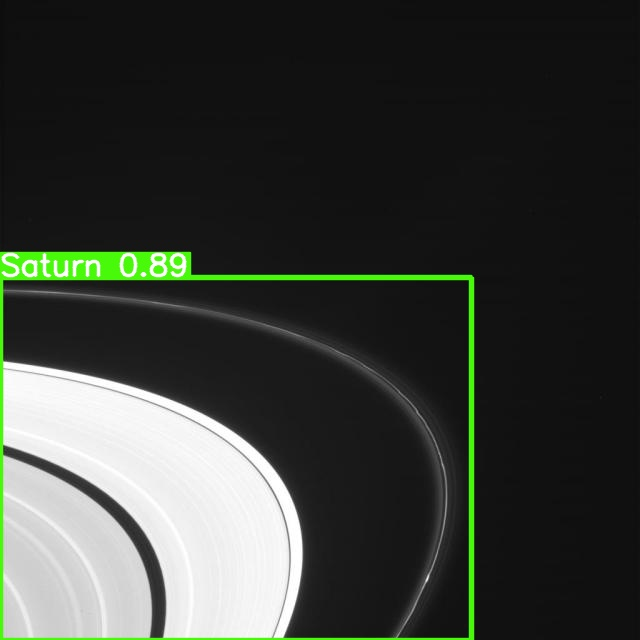

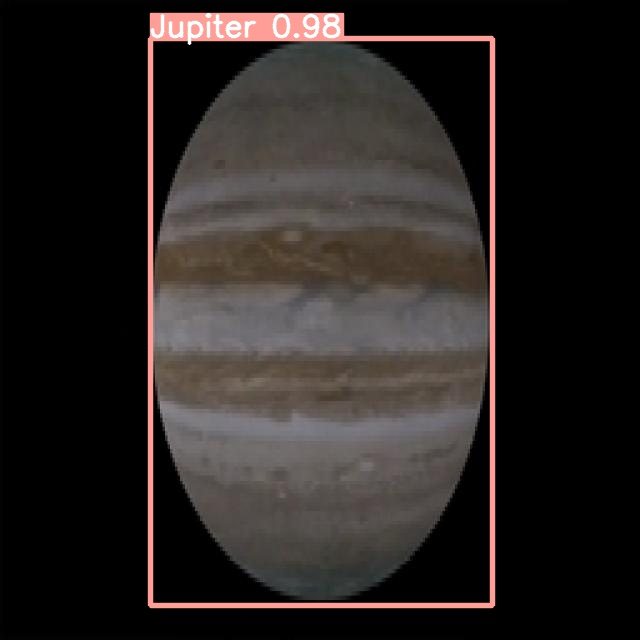

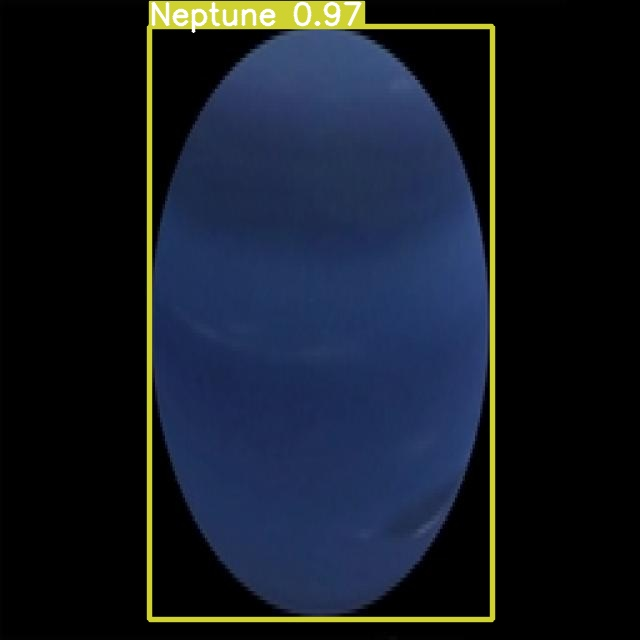

In [69]:
#print(os.listdir('runs/detect/predict'))
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:3]: # extracts the first 3 images
      display(Image(filename=image_path, width=600))
      print('\n')

In [78]:
project.version(9).deploy(model_type="yolov8", model_path=f"datasets/Planet-Detection-9/runs/detect/train3/")
#print(os.listdir('datasets/Planet-Detection-9/runs/detect/train3/weights'))

View the status of your deployment at: https://app.roboflow.com/college-qcgpx/planet-detection/deploy/9
Share your model with the world at: https://universe.roboflow.com/college-qcgpx/planet-detection/model/9


In [88]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
dataset_version = 9 # model version 9
dataset_location = 'datasets/Planet-Detection-9'

model = project.version(dataset_version).model

#choose random test set image
import random
test_set_loc = dataset_location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on Mercury-108-_jpg.rf.f5f0f5648bd1c8e90cc1d56836b8f571.jpg


{'predictions': [{'x': 320.0,
   'y': 319.0,
   'width': 338.0,
   'height': 598.0,
   'confidence': 0.9802666902542114,
   'class': 'Mercury',
   'image_path': 'datasets/Planet-Detection-9/test/images/Mercury-108-_jpg.rf.f5f0f5648bd1c8e90cc1d56836b8f571.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}